## Classification Problems in Machine Learning
Classification problems are an important category of problems in machine learning. These problems have important implication to businesses, will the next marketing campaign lead to conversion of customers. Will the next customer acquired lead to break-even. 

There are two kind of Classification Problems:
- **BINARY CLASSIFICATION**: This is kind of problems where the answers are binary in outcome, *To be !! Or Not to be!!*. The output in these kind of problems is in form of Yes/No or 0/1 (Encoded as a binary variable). Some of the examples of these kind of problem can be:
    - Will a particular laptop/desktop will ask for a repair or not
    - Predict if a customer will default on loan or not
    - Will a newly hired employee is going to perform optimally or not
    - Will a new digital marketing campaign generate higher conversion rates
- **MULTICLASS CLASSIFICATION**: This is a kind of problem where the output will be a discreet set of elements. *Note the word Discreet here*. The output in these variables are again encoded in categorical variables (like 0 - 9 in case we have 9 categories). Some of the examples can be:
    - What is the possible rating of a newly hired employee on a scale of 1 - 5
    - Classification of MNIST data set to classify images
    
***NOTE***: *MNIST data set of 70,000 small images of digits handwritten by high-school students and employees of US Census Bureau. This algorithm has been used as a playground for any machine learning algorithm. I will try to cover that dataset in some other notebook. In this notebook we will be using a relatively simpler dataset.*

---
**LOGISTIC REGRESSION**: There are many ways of solving a classification problem, one of the methods is to use logistic regression. There are other methods example - Classification Trees (we will cover this in a separate article). Neural Networks are also used to solve classification problem actively. However, our focus area in this article will be Logistic Regression. 

<br>Reason for the name Logistic is such because the modeling is done via a function:
<br><center> Logistic Function = $\large \frac{1}{1 + e^{-z}}$</center>
<br>This function is also called a *SIGMOID FUNCTION*
<br> Z is our regular Liner Regression equation and therefore:
<br> <center>Z = $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... \beta_nX_n$</center>

Now we have formulated a problem in multi-variables which can be converted into a Sigmoid Function generating a value. Now we also know one more thing the Sigmoid Function can take maximum value of 1 as z $\to \infty$
<br>Similarly the Sigmoid Function takes minimum value of 0 as z $\to -\infty$

By above discussion we have converted a function varying [$-\infty, \infty$] $\to [0,1]$

**THRESHOLD PROBABILITY**: One more issue which remains here is, we have a function which still takes a continuous values between 0 and 1. However, in case of a binary classification we need value either 0 or 1. So we use a certain threshold probability e.g. 0.5. So if our Logistic Function takes values above 0.5 we treat that value to be 1 and if below or equal to 0.5 we treat that value to be 0. 

<br>This is a feat in-itself we have converted a continuous function which takes value between $-\infty$ and $\infty$ to a function which takes exact values as 0 or 1, therefore generating a Binary Classifier. 

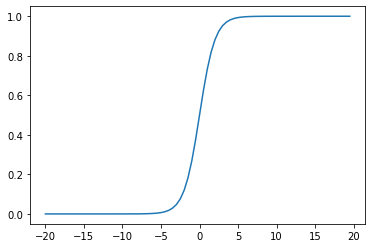

In [1]:
##Plotting of Sigmoid function
import numpy as np
import matplotlib.pyplot as plt
A = np.arange(-20,20,0.5)
B = 1/(1 + np.exp(-A))
plt.plot(A, B)
plt.show()


Above is a code to plot a sigmoid function. You can change the values to any value on both the sides, the function will never go below 0 and never above 1. 

---
Let us now start the process of Modeling, as we know any modeling activity consists of following steps:
- Read Data
- Process the Data
- Run the model
- Choose the most important Independent variables
- Fine-tune the model by evaluating the performance of the model 

In logistic regression we choose the **THRESHOLD VALUES** and given they are chosen manually we need to fine-tune the model via choosing appropriate Threshold. 

Reading the dataset. This dataset is publicly available at
<br> https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/.

However, for running the model we will make some changes to the data set.
<br>*Steps to use the data*:
1. Download the data from the above link
2. Open the data in excel sheet and Data Tab -> Text to Columns -> Split using Delimiters -> Select Space -> Save data as CSV file in desired location
3. Load the data in python using ```pd.read_csv()```
4. Create Column names as given in ```base_data_2.columns = [...]```
5. The original dataset has 1 and 2 has status for bad_loan and non_bad_loan we convert them into 0 and 1. This is just for the sake of ease of use. 

In order to run our model we will be selecting some columns from the data set which are:
<br> checkin_acc, duration, credit_history, amount, savings_acc, present_emp_since, inst_rate, personal_status,inst_plans, num_credits, job, status

<br>You can try running the model on the entire dataset as an exercise. For now we will be using the truncated data.
<br>I have also saved the truncated dataset (with selected columns) at following git-hub repo:
<br> https://github.com/muditsharma1234/Machine-Learning-Basics/blob/main/2022_05%20Classification%20Problems/Datasets/German%20Credit%20Data.csv



In [48]:
import pandas as pd
import numpy as np
base_data_2 = pd.read_csv("Datasets/german.data.csv",header = None)
#print(base_data_2.head())
#base_data_2 = pd.read_csv("~/Downloads/german.data.csv",header = None)
base_data_2.columns = ['checkin_acc','duration','credit_history','purpose','amount',
                      'savings_acc','present_emp_since','inst_rate',
                      'personal_status','other_debters','residing_since','property','age','inst_plans','housing',
                      'num_credits','job','dependent_count','telephone','foreign_worker','status']
base_data_2['status'] = np.where(base_data_2['status']==1,0,1)
base_data_2.head()

,checkin_acc,duration,credit_history,purpose,amount,savings_acc,present_emp_since,inst_rate,personal_status,other_debters,...,property,age,inst_plans,housing,num_credits,job,dependent_count,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [49]:
import pandas as pd
base_data = pd.read_csv("Datasets/German Credit Data.csv") 

#If you want to arrive at the truncated data-set in this notebook from the original dataset you can run following steps 
#On the base_data_2 extracted above
#selected_columns = ['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
#       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
#       'age', 'inst_plans', 'num_credits', 'job', 'status']
#base_data1 = base_data_2[selected_columns]

base_data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


Now that we have downloaded/ extracted the truncated dataset let us try to understand what each of these columns mean. 
<br>You can find the description of the original dataset here: 
<br>https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/ 
<br>In the file named ```german.doc```. There is a table in the end which we will come to when we try to optimize our model. 


Let us try to describe the data first to understand what is there in the data as there are a lot of codes in the data like - A11, A12 in ```checckin_acc``` column. 

***DESCRIPTION OF THE DATA SET***
<img src = "Images/Data_Description.png" width = 800>

Let us look at the dataframe to understand the columns in the data and completeness of the same. As you can see below there are 1000 rows in dataset and none of the columns is has a null element (Non-Null count in each is = 1000)

In [9]:
print(base_data.info())
print("\n \n Shape of the data set is given by -",base_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB
None

 
 Shape of the data set is given by - (1000, 14)


As we can see there are 7 categorical variables and 7 numerical variables in the data-set. There are total 1000 data points in the dataset. 
<br>Our output variable is Status whose value 
- **1: Bad Credit (Liable to Default)** 
- **0: Good Credit (Not Liable to Default)**

In [10]:
base_data.status.value_counts()

0    700
1    300
Name: status, dtype: int64

There is a 70-30 split of the data between bad and good credit. If this was more skewed in either direction we might have fallen into the problem of ```oversampling/ under-sampling``` there are techniques to resolve the same I will cover them in another article. 
<br>For now our data is pretty well behaved with the given 70-30 split. 

We extract the X-features which are our Independent Variables. 

In [11]:
X_features = list(base_data.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

We extract our Dependent and Independent variables using the command set above. We have following result:
- Independent Variables: 13 Which will be used to predict the dependent variables
- Dependent Variable: There is only 1 dependent variable with 2 levels (0 & 1) therefore this becomes a binary prediction problem

Let us start our process of data processing which will have following steps:
- Encoding Categorical Variables: 

In [12]:
encoded_base_data = pd.get_dummies(base_data[X_features],
                                  drop_first = True)

list(encoded_base_data.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

As we know ```get_dummies``` method of pandas will only encode the ```object``` type of data and ```drop_first``` creates K-1 categories from K levels of categorical data. For example as is evident from the data-description table above our ```checkin_acc``` has 4 levels. However, in this case ```get_dummies``` method drops the first level. 

Remember we could have added the first level also. However, as per our discussion in the linear regression we know that Multicollinearity requires treatment otherwise 
- Condition Number value becomes too high
- VIF parameter also becomes higher than 4 and our model may not be able to fit the data appropriately

<br>And if we include all the levels of the categorical variable then by using K-1 levels we can predict the value of $K^{th}$ level and this is a typical case of multicollinearity. 

In [13]:
encoded_base_data[['checkin_acc_A13','checkin_acc_A14','checkin_acc_A12']].head()

,checkin_acc_A13,checkin_acc_A14,checkin_acc_A12
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,0
4,0,0,0


Let us start building our model now

In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
Y = base_data['status']
X = sm.add_constant(encoded_base_data)

##Splitting the data into train and test datasets

train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.30,
                                                   random_state = 1)

In [15]:
logistic_model = sm.Logit(train_y,train_X)
logistic_model_fit = logistic_model.fit()
logistic_model_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.467094
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.241     
Dependent Variable:   status            AIC:               713.9312  
Date:                 2022-05-16 18:32  BIC:               850.4636  
No. Observations:     700               Log-Likelihood:    -326.97   
Df Model:             29                LL-Null:           -430.94   
Df Residuals:         670               LLR p-value:       5.8781e-29
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.2300   1.2040 -0.1910 0.8485 -2.5899  2.1299
duration               0.0258   0.0109  2.3733 0.0176  0.0045  0.0471
amount                 0.0001   0.0001  2.5747 0.0100  0.0000  0.0002
inst_rate              0.4049   0.1006  4.0239 0.0001  0.2077  0.6022
residing_since         0.0921   0.0959  0.9606 0.3368 -0.0958  0.2800
age                   -0.0223   0.0099 -2.2649 0.0235 -0.0417 -0.0030
num_credits            0.5764   0.2322  2.4827 0.0130  0.1214  1.0315
checkin_acc_A12       -0.5504   0.2447 -2.2496 0.0245 -1.0299 -0.0709
checkin_acc_A13       -0.8236   0.4203 -1.9593 0.0501 -1.6475  0.0003
checkin_acc_A14       -1.7092   0.2679 -6.3804 0.0000 -2.2342 -1.1841
credit_history_A31    -0.6283   0.6359 -0.9881 0.3231 -1.8746  0.6180
credit_history_A32    -0.8356   0.5163 -1.6183 0.1056 -1.8475  0.1764
credit_history_A33    -1.1568   0.5614 -2.0605 0.0393 -2.2571 -0.0564
credit_history_A34    -2.2153   0.5423 -4.0853 0.0000 -3.2782 -1.1525
savings_acc_A62       -0.0425   0.3292 -0.1291 0.8973 -0.6877  0.6027
savings_acc_A63       -0.1563   0.4679 -0.3340 0.7384 -1.0734  0.7608
savings_acc_A64       -1.7350   0.6657 -2.6062 0.0092 -3.0397 -0.4302
savings_acc_A65       -0.7814   0.2935 -2.6621 0.0078 -1.3568 -0.2061
present_emp_since_A72  0.0150   0.4713  0.0319 0.9745 -0.9087  0.9388
present_emp_since_A73 -0.1361   0.4476 -0.3040 0.7611 -1.0134  0.7413
present_emp_since_A74 -0.7676   0.4846 -1.5839 0.1132 -1.7175  0.1822
present_emp_since_A75 -0.3189   0.4560 -0.6994 0.4843 -1.2127  0.5748
personal_status_A92   -0.3978   0.4870 -0.8169 0.4140 -1.3524  0.5567
personal_status_A93   -0.9293   0.4754 -1.9551 0.0506 -1.8610  0.0023
personal_status_A94   -0.8490   0.5533 -1.5345 0.1249 -1.9333  0.2354
inst_plans_A142       -0.2831   0.4810 -0.5884 0.5562 -1.2258  0.6597
inst_plans_A143       -0.5198   0.2693 -1.9299 0.0536 -1.0477  0.0081
job_A172               0.5035   0.8219  0.6126 0.5401 -1.1074  2.1144
job_A173               0.3228   0.7917  0.4078 0.6835 -1.2289  1.8745
job_A174               0.2335   0.7970  0.2930 0.7696 -1.3287  1.7957
=====================================================================

"""

Default value of number of iterations is 35 beyond which the model fails. 
<br>Following are the parameters which define the quality of the logistic regression model:
- P-Values associated with the parameters (This follows Chi-Square distribution unlike in Linear Regression where the coefficient follows T-Distribution): This test is called *WALD's TEST*
- Pseudo-R-Square: Serves the same role as R-Square and Adjusted R-Square serves in the linear regression. 
    -  *But this is not used to say 20% of the parameters are explained by the model (That will be a very bad model). We use confusion matrix to identify the accuracy of the model.*
- Likelihood ratio significance of the overall model similar to F-statistics in the Linear Regression model (here this is a P-value)

**FILTERING THE MOST SIGNIFICANT VARIABLES**
<br>Our P-values are stored in the ```pvalues``` variable in ```logistic_model_fit``` this is a ```pandas.series``` type of variable and the index of this variable is the names of our p-values it can be easily filtered. 
<br>Remember we are looking for $P-Value \leq 0.05$. 
<br>Conversion into list makes it easier to extract the data from the original dataset. 
<br>We will be saving our significant variables in ```significant_variables```

In [16]:
significant_variables = list(logistic_model_fit.pvalues[logistic_model_fit.pvalues <= 0.05].index)
print(significant_variables)
print(len(logistic_model_fit.pvalues))

['duration', 'amount', 'inst_rate', 'age', 'num_credits', 'checkin_acc_A12', 'checkin_acc_A14', 'credit_history_A33', 'credit_history_A34', 'savings_acc_A64', 'savings_acc_A65']
30


We have 11 variables which are significant out of 30 variables. (Remember our original list of 13 odd variables got inflated due to the Encoding of these variables).
<br>Now let us run the model agan with the selected variables.

In [17]:
logistic_model2 = sm.Logit(train_y,sm.add_constant(train_X[significant_variables]))
logistic_model_fit2 = logistic_model2.fit()
logistic_model_fit2.summary2()

Optimization terminated successfully.
         Current function value: 0.488668
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.206     
Dependent Variable:  status           AIC:              708.1347  
Date:                2022-05-16 18:32 BIC:              762.7477  
No. Observations:    700              Log-Likelihood:   -342.07   
Df Model:            11               LL-Null:          -430.94   
Df Residuals:        688              LLR p-value:      2.9923e-32
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -1.7234   0.4984 -3.4576 0.0005 -2.7004 -0.7465
duration            0.0231   0.0104  2.2258 0.0260  0.0028  0.0434
amount              0.0001   0.0000  2.7975 0.0052  0.0000  0.0002
inst_rate           0.3623   0.0953  3.8006 0.0001  0.1755  0.5492
age                -0.0226   0.0086 -2.6412 0.0083 -0.0393 -0.0058
num_credits         0.6401   0.2125  3.0116 0.0026  0.2235  1.0566
checkin_acc_A12    -0.4399   0.2236 -1.9674 0.0491 -0.8782 -0.0017
checkin_acc_A14    -1.6611   0.2467 -6.7323 0.0000 -2.1447 -1.1775
credit_history_A33 -0.5156   0.3287 -1.5686 0.1167 -1.1599  0.1287
credit_history_A34 -1.5610   0.3047 -5.1238 0.0000 -2.1581 -0.9639
savings_acc_A64    -1.6827   0.6503 -2.5876 0.0097 -2.9573 -0.4082
savings_acc_A65    -0.7644   0.2743 -2.7867 0.0053 -1.3020 -0.2268
==================================================================

"""

In [18]:
significant_variables2 = list(logistic_model_fit2.pvalues[logistic_model_fit2.pvalues <= 0.05].index)

In [19]:
logistic_model3 = sm.Logit(train_y,sm.add_constant(train_X[significant_variables2]))
logistic_model_fit3 = logistic_model3.fit()
logistic_model_fit3.summary2()

Optimization terminated successfully.
         Current function value: 0.490472
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.203     
Dependent Variable:  status           AIC:              708.6604  
Date:                2022-05-16 18:32 BIC:              758.7223  
No. Observations:    700              Log-Likelihood:   -343.33   
Df Model:            10               LL-Null:          -430.94   
Df Residuals:        689              LLR p-value:      2.2994e-32
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -1.5846   0.4899 -3.2343 0.0012 -2.5448 -0.6243
duration            0.0215   0.0103  2.0919 0.0364  0.0014  0.0416
amount              0.0001   0.0000  2.7755 0.0055  0.0000  0.0002
inst_rate           0.3647   0.0952  3.8324 0.0001  0.1782  0.5512
age                -0.0234   0.0085 -2.7341 0.0063 -0.0401 -0.0066
num_credits         0.5343   0.2000  2.6714 0.0076  0.1423  0.9262
checkin_acc_A12    -0.4736   0.2219 -2.1340 0.0328 -0.9086 -0.0386
checkin_acc_A14    -1.7017   0.2458 -6.9225 0.0000 -2.1834 -1.2199
credit_history_A34 -1.4123   0.2872 -4.9182 0.0000 -1.9751 -0.8495
savings_acc_A64    -1.6363   0.6444 -2.5392 0.0111 -2.8994 -0.3733
savings_acc_A65    -0.7553   0.2748 -2.7484 0.0060 -1.2939 -0.2167
==================================================================

"""

Now we predict the values of our variables basis the ```model3``` we created.

In [20]:
predicted_dataframe = pd.DataFrame({'Actual': test_y,
                                  'Predicted Probability': logistic_model_fit3.predict(
                                      sm.add_constant(test_X[significant_variables2]))})

In [21]:
predicted_dataframe.head()

,Actual,Predicted Probability
507,1,0.316365
818,0,0.808517
452,0,0.157357
368,1,0.653382
242,1,0.835823


<br>We have generated the ```sigmoid``` function which varies between 0 and 1 in ```Predicted Probability``` column now we need to set a cut-off so we can segregate them into Yes and No event. 
We use the cut-off as 0.5 if the value is greater than 0.5 we assume the value to be 1 which is Bad Credit and 0 which is Good Credit Score

In [22]:
predicted_dataframe['Predicted'] = predicted_dataframe['Predicted Probability'].map(lambda x: 1 if x > 0.5 else 0)
predicted_dataframe.head(10)

,Actual,Predicted Probability,Predicted
507,1,0.316365,0
818,0,0.808517,1
452,0,0.157357,0
368,1,0.653382,1
242,1,0.835823,1
929,0,0.590245,1
262,0,0.388718,0
810,0,0.320521,0
318,0,0.070908,0
49,0,0.193255,0


As we can see that some of the values are correctly predicted and some are incorrectly predicted. Let us tabulate the values.

### Evaluating the Model Performance
Now that we have created the model let us evaluate the performance of the model. Basically how well the model is performing against the actual output of 0 and 1. Some of the methods to be used in evaluation of the results are:
- Confusion Matrix
- ROC Curve
- Youlden's Metrics
- Cost Function

In [23]:
predicted_dataframe[['Actual','Predicted']].value_counts(normalize = False).sort_index()

Actual  Predicted
0       0            185
        1             29
1       0             55
        1             31
dtype: int64

We can see that we have 185 predicted 0 when Actual is 0 and 55 cases where we predicted incorrectly with Good Score
<br>Similarly, we have 31 cases where we predicted Bad Credit Score correctly and 29 cases where we predicted incorrectly. 

Probability of Correctly Predicting Good  = $\large \frac{Correct_0}{Incorrect_0 + Correct_0}$ = $\large \frac{185}{185+29}$ = 86%
<br>Probability of Correctly Predicting Bad = $\large \frac{Correct_1}{Incorrect_1 + Correct_1}$ = $\large \frac{31}{31+55}$ = 36%

While, we have done a good job of predicting Good Score our Probability of predicting Bad score is almost like a chance (36% probability - which is not good enough).
<br>And the bank would be more interested in predicting the Bad Credit rather than Good Credit (from Risk Management Perspective)

In [25]:
pd.crosstab(predicted_dataframe.Actual,predicted_dataframe.Predicted,normalize = False,margins = True)

Predicted,0,1,All
Actual,,,
0,185,29,214
1,55,31,86
All,240,60,300


This representation is called the ***CONFUSION MATRIX***. 
<br>Confusion Matrix has following elements: (Assuming we are trying to predict Bad Credit)
- True Positive: Bad Credit which has been predicted as Bad Credit. 
    - (1,1) element in our above table
- True Negative: Good Credit which has been predicted as Good Credit. 
    - (0,0) element in our above table
- False Positive: Good Credit which has been predicted to be Bad Credit. 
    - (0,1) element in our above table
- False Negative: Bad Credit which has been predicted to be Good Credit. 
    - (1,0) element in our above table

Using the Confusion Matrix we can calculate some of the metrics for the accuracy of the model:
- Sensitivity/ Recall: P(Predicted Class +ve | Actual Class +ve) in our case P(Bad Credit Prediction | Bad Credit Actual)
- Specificity: P(Predicted Class -ve | Actual Class -ve) in our case P(Good Credit Prediction | Good Credit Actual)

This can be specified in terms of True/ False Positive/Negative as follows:
<br> Sensitivity/ Recall = $\large \frac{TP}{TP + FN}$
<br> Specificity = $\large \frac{TN}{TN + FP}$

These results can be easily obtained using Bayes' Theorem. 

Now if you try to understand the above results we are essentially how correctly the model is classifying the Bad and Good Credit. There should be one more metric how correctly the model is segregating the data. 
<br>Which is Probability of Actual Value being Positive given Predicted Value is Positive. 
<br>This metric is called Precision and Precision = $\large \frac{TP}{TP + FP}$

<br>In order to Assess our Model we compute F-Score = $\large\frac{2\times Recall \times Precision}{Recall + Precision}$

In [26]:
from sklearn import metrics
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe.Predicted))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       214
           1       0.52      0.36      0.42        86

    accuracy                           0.72       300
   macro avg       0.64      0.61      0.62       300
weighted avg       0.70      0.72      0.70       300



The above table gives two value each for Precision and Recall because it doesn't know what is our Positive is - 0 or 1. Also, it doesn't give Specificity. 
<br>However, above metrics is sufficient. 

<br>Also, note the model is very good at predicting ```Good Credit``` see the values against 0. However, pretty bad predicting the ```Bad Credit```. 

/Users/tool_vicarious/env1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tool_vicarious/env1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


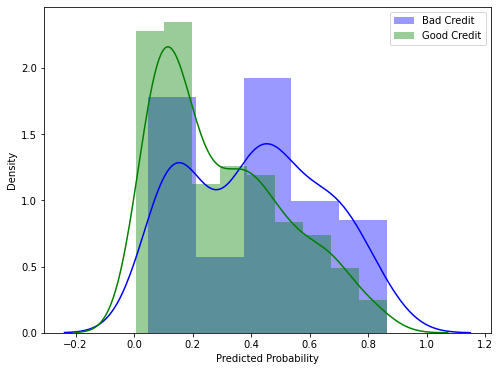

In [27]:
import seaborn as sn
plt.figure(figsize = (8,6))
sn.distplot(predicted_dataframe[predicted_dataframe.Actual == 1]['Predicted Probability'],
            kde = True,color = 'b',label = 'Bad Credit')

sn.distplot(predicted_dataframe['Predicted Probability'],
            kde = True,color = 'g',label = 'Good Credit')
plt.legend()
plt.show()

Here intersection region is our problem, we should try to minimize the intersections so our False Positive and False Negatives start reducing. This can be done by adjusting the ```cut-off``` probability which we had defined to be 0.5.

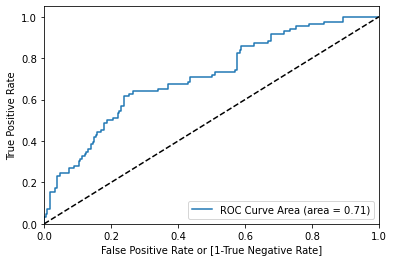

In [28]:
FPR, TPR, thresholds = metrics.roc_curve(predicted_dataframe.Actual,predicted_dataframe['Predicted Probability'])
auc_score = metrics.roc_auc_score(predicted_dataframe.Actual,predicted_dataframe['Predicted Probability'])
plt.plot(FPR,TPR,label = 'ROC Curve Area (area = %0.2f)'%auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Here following is the explanation of the above terms:
- FPR - False Positive Rate (Probability of Getting 0 when actual is 1)
- TPR - True Positive Rate (Probability of Getting 1 when actual is 1)
- AUC Score - Area Under the ROC Curve (ROC Curve is the plotting of FPR against TPR for various values of Probability)
    - AUC should typically be greater than 0.7. However, if the data-sets are imbalanced (Positive Rates < 10%) higher ROC may be misleading so be careful using ROC as the only metric for evaluation. 

In [29]:
precision, recalls,thresholds1 = metrics.precision_recall_curve(predicted_dataframe.Actual,
                                                              predicted_dataframe['Predicted Probability'])

In [30]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "center left")
    plt.ylim([0,1])

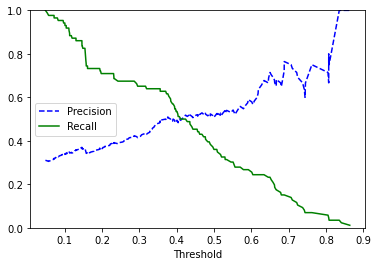

In [31]:
plot_precision_recall_vs_threshold(precision,recalls,thresholds1)
plt.show()

Finding the right cut-off:
<br>Right cut-off can be used to identify what will be the right level of cut-off (Right now we have chosen 0.5). Some of the methods used for this classification are:
- Youden's Index
- Cost Based Approach

***YOUDEN's INDEX***
<br>Sensitivity and Specificity changes as we change the cut-off values, Youden's is classification cut-off for which following function:
<br><center> **Sensitivity + Specificity - 1** </center>
<br>Is maximized. 

<br>We know formula for Sensitivity = $\large \frac{TP}{TP + FN}$
<br>Also, specificity = $\large \frac{TN}{TN+FP}$
<br>Also for TPR = Sensitivity
<br>For FPR = 1 - Specificity = $\large \frac{FP}{FP+TN}$

<br>Using our equation above we have Sensitivity + Specificity - 1 = TPR - FPR.
<br>FPR, TPR we already computed in our AUC curve plotting. 

In [32]:
youlden_df = pd.DataFrame({"TPR":TPR,"FPR":FPR,"THRESHOLDS":thresholds})

youlden_df['YOULDEN'] = youlden_df['TPR'] - youlden_df['FPR']
youlden_df.head()

,TPR,FPR,THRESHOLDS,YOULDEN
0,0.000000,0.000000,1.864052,0.000000
1,0.011628,0.000000,0.864052,0.011628
2,0.034884,0.000000,0.835823,0.034884
3,0.034884,0.004673,0.808517,0.030211
4,0.046512,0.004673,0.807549,0.041839


In [33]:
youlden_df.sort_values('YOULDEN',ascending = False).head()

,TPR,FPR,THRESHOLDS,YOULDEN
56,0.616279,0.238318,0.376039,0.377961
58,0.627907,0.252336,0.370318,0.375571
60,0.639535,0.266355,0.355519,0.373180
57,0.616279,0.252336,0.372589,0.363943
59,0.627907,0.266355,0.355693,0.361552


In [34]:
predicted_dataframe['Predicted New'] = predicted_dataframe['Predicted Probability'].map(lambda x: 1 if x > 0.377961
                                                                                       else 0)

In [35]:
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe['Predicted New']))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       214
           1       0.50      0.60      0.55        86

    accuracy                           0.72       300
   macro avg       0.67      0.68      0.67       300
weighted avg       0.73      0.72      0.72       300



In [36]:
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe['Predicted']))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       214
           1       0.52      0.36      0.42        86

    accuracy                           0.72       300
   macro avg       0.64      0.61      0.62       300
weighted avg       0.70      0.72      0.70       300



In [37]:
pd.crosstab(predicted_dataframe.Actual,
            predicted_dataframe['Predicted New'],
            normalize = False,margins = True)

Predicted New,0,1,All
Actual,,,
0,163,51,214
1,34,52,86
All,197,103,300


In [38]:
pd.crosstab(predicted_dataframe.Actual,
            predicted_dataframe['Predicted'],
            normalize = False,margins = True)

Predicted,0,1,All
Actual,,,
0,185,29,214
1,55,31,86
All,240,60,300


I have printed the previous tables just for our recall, as we can see we have indeed improved our prediction at a small cost of reducing True Negative rates (Predicting 0 when it is actually 0). 

In [46]:
print(metrics.confusion_matrix(predicted_dataframe.Actual,predicted_dataframe.Predicted)[1,0])
print(metrics.confusion_matrix(predicted_dataframe.Actual,predicted_dataframe.Predicted)[0,1])

55
29


In [49]:
def get_cost(actual,predicted,cost_FP, cost_FN):
    C_Matrix = metrics.confusion_matrix(actual,predicted)
    return C_Matrix[0,1]*cost_FP + C_Matrix[1,0]*cost_FN

In [114]:
cost_dataframe = pd.DataFrame(columns = ['Probability','Cost'])
index = 1
for probability in range(10,50):
    cost = get_cost(predicted_dataframe.Actual,
                   predicted_dataframe['Predicted Probability'].map(lambda x: 1 if x > (probability/100) else 0),
                   100,200)
    cost_dataframe.loc[index] = [(probability/100),cost]
    index+=1

In [115]:
min_prob= cost_dataframe.sort_values('Cost',ascending = True).head().reset_index()['Probability'][0]
print(min_prob)

0.36


In [123]:
predicted_dataframe['Predicted_Cost'] = predicted_dataframe['Predicted Probability'].map(lambda x: 1 
                                                                                         if x > min_prob else 0)

In [124]:
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe['Predicted_Cost']))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.63      0.56        86

    accuracy                           0.71       300
   macro avg       0.67      0.69      0.67       300
weighted avg       0.74      0.71      0.72       300



In [125]:
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe['Predicted New']))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       214
           1       0.50      0.60      0.55        86

    accuracy                           0.72       300
   macro avg       0.67      0.68      0.67       300
weighted avg       0.73      0.72      0.72       300



In [119]:
pd.crosstab(predicted_dataframe.Actual,
            predicted_dataframe['Predicted_Cost'],
            normalize = False,margins = True)

Predicted_Cost,0,1,All
Actual,,,
0,160,54,214
1,32,54,86
All,192,108,300
